# **Previsão do Cargo Ideal**

## **1. Introdução**
Neste projeto, construirei um modelo de aprendizado de máquina para prever o cargo ideal na área de dados com base no estudo *State of Data Brazil 2022*. O problema é abordado como uma tarefa de classificação supervisionada, onde o modelo aprenderá a partir de dados rotulados para determinar a posição mais adequada para um candidato com base em diversos atributos.  

Utilizarei o seguinte pipeline baseado no processo KDD (Knowledge Discovery in Databases):  

1. **Seleção** – Identificar e selecionar as instâncias e atributos mais relevantes para a análise.  
2. **Pré-processamento** – Tratar dados ausentes, incorretos ou inconsistentes para melhorar a qualidade geral.  
3. **Transformação** – Converter os dados para um formato compatível com as técnicas de modelagem escolhidas.  
4. **Mineração de Dados** – Treinar e comparar modelos de classificação para prever o cargo ideal.  
5. **Avaliação** – Avaliar o desempenho dos modelos e analisar os resultados para selecionar a melhor abordagem.  

Neste notebook, realizarei a análise exploratória dos dados (EDA), cobrindo as etapas 1 a 3 do pipeline acima. O principal objetivo é extrair insights que revelem padrões entre diferentes perfis de candidatos a partir das variáveis disponíveis. Mesmo antes de construir o modelo final, essa análise fornecerá informações úteis sobre tendências de adequação a cargos na área de dados. Além disso, explicarei cada etapa em detalhes, justificando as decisões tomadas ao longo do processo.

## **2. Configurações Iniciais**

### **2.1 Importando as Bibliotecas**

In [412]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, ConfusionMatrixDisplay, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## **2.2 Compeendendo a Base da Dados**
- O dataset foi coletado do kaggle: https://www.kaggle.com/datasets/datahackers/state-of-data-2022
- Mais detalhes no site da pesquisa: https://www.stateofdata.com.br
- Os dados da pesquisa foram segmentados em oito partes, sendo as mais adequadas para nossas previsões as partes 1, 2 e 4, que correspondem, respectivamente, 
    - Dados demográficos, 
    - Dados sobre a carreira  
    - Conhecimentos na área de dados.

# **3. Preocesso KDD**
A seguir, vamos explorar a base de dados a fim de gerar um modelo que concentre o conhecimento extraído que seja necessário para a execução da tarefa de classificação para encontrar qual o *cargo* ideal para um candidato a uma vaga na área de dados. O processo KDD ajuda a organizar esse processo e a garantir um mínimo de procedimentos imprescendíveis para a exploração de qualquer tarefa de extração de conhecimento. Dessa forma, vamos utilizar suas primeiras 3 etapas para a análise exploratória dos dados.

## **3.1 Seleção**
A seleção trata da escolha do conjunto de dados alvo e escolha de subconjuntos de variáveis
ou amostras na qual a descoberta de conhecimento será performada.

In [413]:
# Importando a base de dados
df = pd.read_csv('../base/State_of_data_2022.csv')

# Função para filtrar colunas
def filtrar_colunas(df):
    colunas_desejadas = [
        "('P1_a ', 'Idade')", "('P1_b ', 'Genero')", "('P1_c ', 'Cor/raca/etnia')", "('P1_d ', 'PCD')", "('P1_g ', 'vive_no_brasil')", "('P1_i ', 'Estado onde mora')",
        "('P1_l ', 'Nivel de Ensino')", "('P1_m ', 'Área de Formação')", "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')", "('P4_f ', 'Entre as linguagens listadas abaixo, qual é a sua preferida?')",
        "('P4_g ', 'Quais dos bancos de dados/fontes de dados listados abaixo você utiliza no trabalho?')", "('P4_h ', 'Dentre as opções listadas, qual sua Cloud preferida?')", "('P2_f ', 'Cargo Atual')"
    ]
    return df[colunas_desejadas]

# Aplicando a função
df = filtrar_colunas(df)

# Renomeando as colunas
mapeamento_colunas = {
    "('P1_a ', 'Idade')": 'idade',
    "('P1_b ', 'Genero')": 'genero',
    "('P1_c ', 'Cor/raca/etnia')": 'etnia',
    "('P1_d ', 'PCD')": 'pcd',
    "('P1_g ', 'vive_no_brasil')": 'vive_no_brasil',
    "('P1_i ', 'Estado onde mora')": 'estado_moradia',
    "('P1_l ', 'Nivel de Ensino')": 'nivel_ensino',
    "('P1_m ', 'Área de Formação')": 'formacao',
    "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')": 'tempo_experiencia_dados',
    "('P4_f ', 'Entre as linguagens listadas abaixo, qual é a sua preferida?')": 'linguagens_preferidas',
    "('P4_g ', 'Quais dos bancos de dados/fontes de dados listados abaixo você utiliza no trabalho?')": 'bancos_de_dados',
    "('P4_h ', 'Dentre as opções listadas, qual sua Cloud preferida?')": 'cloud_preferida',
    "('P2_f ', 'Cargo Atual')": 'cargo'
}

df.rename(columns=mapeamento_colunas, inplace=True)
df.head()

,idade,genero,etnia,pcd,vive_no_brasil,estado_moradia,nivel_ensino,formacao,tempo_experiencia_dados,linguagens_preferidas,bancos_de_dados,cloud_preferida,cargo
0,39.0,Masculino,Parda,Não,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 1 a 2 anos,R,"PostgreSQL, Oracle, MySQL, SQL SERVER",Amazon Web Services (AWS),DBA/Administrador de Banco de Dados
1,32.0,Masculino,Parda,Não,True,Pará (PA),Graduação/Bacharelado,Outras Engenharias,de 3 a 4 anos,NaN,NaN,NaN,NaN
2,53.0,Masculino,Branca,Não,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 3 a 4 anos,Python,"PostgreSQL, MySQL, Oracle, DB2",Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...
3,27.0,Masculino,Branca,Não,True,Minas Gerais (MG),Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...,de 4 a 6 anos,Python,Google BigQuery,Não sei opinar,Cientista de Dados/Data Scientist
4,46.0,Feminino,Branca,Não,True,Pará (PA),Pós-graduação,Computação / Engenharia de Software / Sistemas...,Não tenho experiência na área de dados,Python,Microsoft Access,Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...


In [414]:
print(f'O dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas')

O dataset tem 4271 linhas e 13 colunas


In [415]:
df.pcd.value_counts()

pcd
Não                     4198
Sim                       54
Prefiro não informar      19
Name: count, dtype: int64

In [416]:
# Dropando a coluna 'pcd'
df.drop('pcd', axis=1, inplace=True)

## **3.2 Pré-processamento**
O pré-processamento trata da remoção de ruído e manipulação de dados ausentes e discrepantes. \
Aqui serão abordadas as tarefas de remoção de dados ausentes, e remoção de outiliers.

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idade                    4197 non-null   float64
 1   genero                   4262 non-null   object 
 2   etnia                    4271 non-null   object 
 3   vive_no_brasil           4271 non-null   bool   
 4   estado_moradia           4156 non-null   object 
 5   nivel_ensino             4271 non-null   object 
 6   formacao                 4149 non-null   object 
 7   tempo_experiencia_dados  3694 non-null   object 
 8   linguagens_preferidas    2979 non-null   object 
 9   bancos_de_dados          2978 non-null   object 
 10  cloud_preferida          2981 non-null   object 
 11  cargo                    2981 non-null   object 
dtypes: bool(1), float64(1), object(10)
memory usage: 371.3+ KB


In [418]:
# Verificando os valores nulos 
df.isna().sum() / df.shape[0]

idade                      0.017326
genero                     0.002107
etnia                      0.000000
vive_no_brasil             0.000000
estado_moradia             0.026926
nivel_ensino               0.000000
formacao                   0.028565
tempo_experiencia_dados    0.135097
linguagens_preferidas      0.302505
bancos_de_dados            0.302739
cloud_preferida            0.302037
cargo                      0.302037
dtype: float64

- **Observação**  
    - As colunas *linguagens_preferidas*, *bancos_de_dados*, *cloud_preferida* e *cargo* têm 30% das linhas com dados nulos;
    - A coluna *tempo_experiencia_dados* tem 13% da dados faltantes
    - As colunas *formacao* e *estado_moradia* estão com 2% de dados nulos;
    - E 1% de *idade* está faltante e 0.2% de *genero* está nulo.

Então, devemos definir uma estratégia de tratamento, que pode incluir a remoção dessas linhas, a substituição por valores padrão ou a imputação com base em padrões identificados nos dados disponíveis. A escolha dependerá da distribuição dos valores e do impacto na qualidade do modelo.

### **3.2.1 Remoção dos nulos da idade**

In [419]:
# Verificando as média e mediana da idade
print(f'Média de idade: {df.idade.mean()}')
print(f'Mediana de idade: {df.idade.median()}')


Média de idade: 31.169168453657374
Mediana de idade: 30.0


Como a média e a mediana da idade estão próximas podemos trocar os valores nulos pela mediana. 

In [420]:
# Trocando pela mediana os valores nulos da idade
df.idade.fillna(df.idade.median(), inplace=True)

### **3.2.2 Remoção dos nulos de gênero**

In [421]:
# Vendo os valores únicos da coluna genero
df.genero.unique()

array(['Masculino', 'Feminino', nan, 'Prefiro não informar'], dtype=object)

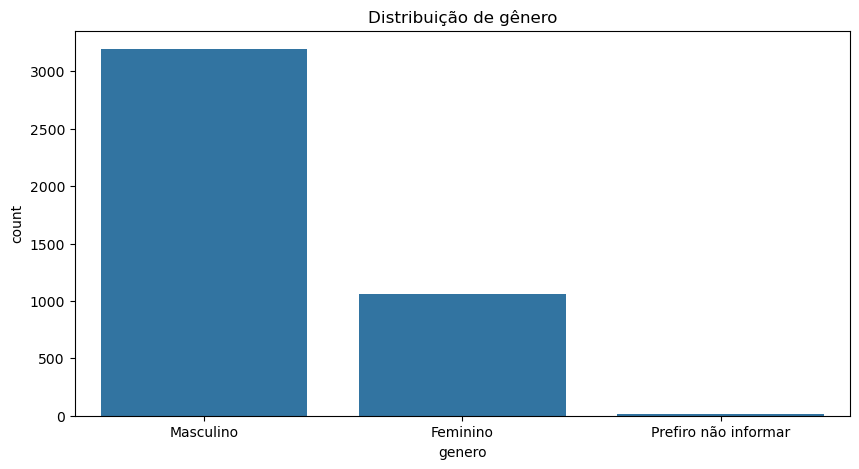

In [422]:
# Grafico de barras para a coluna genero
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='genero')
plt.title('Distribuição de gênero')
plt.show()

Como os dados faltantes na coluna *gênero* representam menos de 1%, podemos substituí-los por "Prefiro não informar".

In [423]:
# Substituindo os valores nulos da coluna genero
df.genero.fillna('Prefiro não informar', inplace=True)

### **3.2.3 Remoção dos nulos de estado moradia**

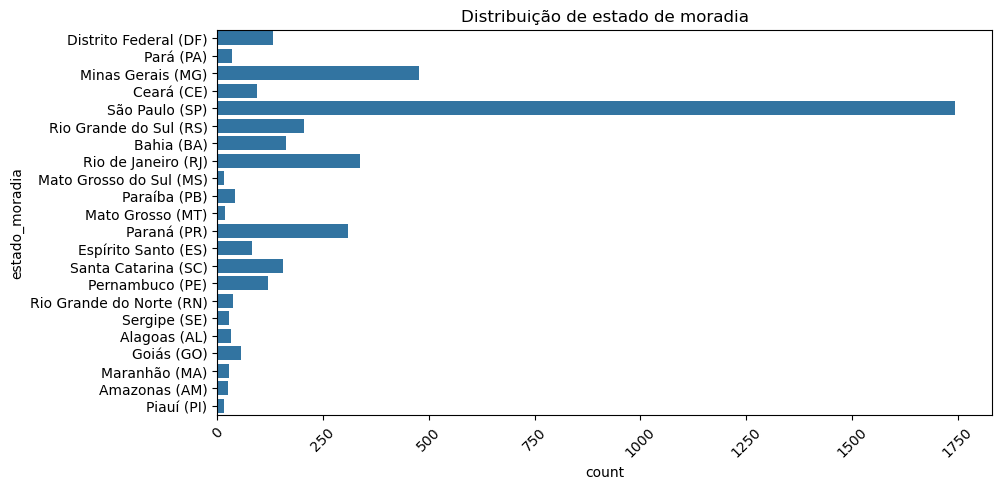

In [424]:
# Grafico de barras para a coluna estado_moradia
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='estado_moradia')
plt.title('Distribuição de estado de moradia')
plt.xticks(rotation=45)
plt.show()

Como a quantidade de valores nulos na coluna é insignificante, a melhor abordagem é trocar os nulos pela moda da coluna, que no caso seria São Paulo.

In [425]:
# Substituindo os valores nulos da coluna estado_moradia
df.estado_moradia.fillna('São Paulo (SP)', inplace=True)

### **3.2.4 Remoção dos nulos da formação**

In [426]:
# valores únicos da coluna nivel_ensino
df.formacao.value_counts()

formacao
Computação / Engenharia de Software / Sistemas de Informação/ TI          1543
Outras Engenharias                                                         941
Economia/ Administração / Contabilidade / Finanças/ Negócios               641
Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais     405
Outra opção                                                                200
Marketing / Publicidade / Comunicação / Jornalismo                         122
Química / Física                                                           112
Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde                     111
Ciências Sociais                                                            74
Name: count, dtype: int64

A mesma abordagem será aplicada para tratar os valores nulos na coluna *formacao*, já que a taxa de ausência é de apenas 2%.

In [427]:
# Substituindo os valores nulos da coluna formacao
df.formacao.fillna('Computação / Engenharia de Software / Sistemas de Informação/ TI', inplace=True)

### **3.2.5 Remoção dos nulos do tempo de experiencia**

In [428]:
# valores únicos da coluna tempo_experiencia_dados
df.tempo_experiencia_dados.value_counts()

tempo_experiencia_dados
de 1 a 2 anos                             980
de 3 a 4 anos                             711
Menos de 1 ano                            596
de 4 a 6 anos                             522
Mais de 10 anos                           403
de 7 a 10 anos                            294
Não tenho experiência na área de dados    188
Name: count, dtype: int64

Como a quantidade de valores nulos na coluna não é insignificante, a melhor abordagem é criar uma nova categoria, "Não informado". Preencher os valores ausentes com a moda da coluna poderia introduzir um viés no modelo, afetando a qualidade das previsões.

In [429]:
# Substituindo os valores nulos da coluna tempo_experiencia_dados
df.tempo_experiencia_dados.fillna('Não informado', inplace=True)

### **3.2.5 Remoção dos nulos das linguagens preferidas, bancos de dados, cloud preferida e cargo**       

In [430]:
# Dados onde a linguagem preferida ou bancos_de_dados ou cloud_preferida ou cargo são nulos
df_nulos = df[df.linguagens_preferidas.isna() | df.bancos_de_dados.isna() | df.cloud_preferida.isna() | df.cargo.isna()]

# Vendos os dados onde a linguagem preferida é nula
df_nulos.head()

,idade,genero,etnia,vive_no_brasil,estado_moradia,nivel_ensino,formacao,tempo_experiencia_dados,linguagens_preferidas,bancos_de_dados,cloud_preferida,cargo
1,32.0,Masculino,Parda,True,Pará (PA),Graduação/Bacharelado,Outras Engenharias,de 3 a 4 anos,NaN,NaN,NaN,NaN
12,31.0,Masculino,Branca,True,São Paulo (SP),Doutorado ou Phd,Outras Engenharias,Não informado,NaN,NaN,NaN,NaN
16,31.0,Masculino,Parda,True,Paraíba (PB),Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...,de 1 a 2 anos,NaN,NaN,NaN,NaN
17,29.0,Masculino,Branca,True,Mato Grosso (MT),Mestrado,Estatística/ Matemática / Matemática Computaci...,de 7 a 10 anos,NaN,NaN,NaN,NaN
20,37.0,Masculino,Branca,True,São Paulo (SP),Pós-graduação,Outras Engenharias,de 4 a 6 anos,NaN,NaN,NaN,NaN


In [431]:
# Vendo quantos % dos dados são nulos
df_nulos.shape[0] / df.shape[0]

0.30273940529150084

Como as quatro colunas possuem **30% de valores nulos** e a contagem total dos valores ausentes é a mesma, isso indica que **as mesmas linhas** possuem esses dados faltantes. Isso sugere que esses registros podem estar incompletos de forma significativa, dificultando a imputação de valores confiáveis.  

Se houvesse apenas uma ou duas colunas com valores nulos, poderíamos tentar substituições baseadas em padrões dos dados. No entanto, como as quatro colunas possuem a mesma distribuição de valores ausentes, significa que um terço do dataset está com informações incompletas nessas variáveis.  

Dado esse cenário, a **melhor abordagem é remover essas linhas**, mesmo que isso signifique perder **30% do dataset**. Manter registros com muitos valores ausentes pode introduzir ruído e prejudicar a qualidade do modelo, pois a imputação nesse caso poderia ser artificial e enviesada.  

In [432]:
# removendo os dados nulos
df.dropna(inplace=True) 
df.head()

,idade,genero,etnia,vive_no_brasil,estado_moradia,nivel_ensino,formacao,tempo_experiencia_dados,linguagens_preferidas,bancos_de_dados,cloud_preferida,cargo
0,39.0,Masculino,Parda,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 1 a 2 anos,R,"PostgreSQL, Oracle, MySQL, SQL SERVER",Amazon Web Services (AWS),DBA/Administrador de Banco de Dados
2,53.0,Masculino,Branca,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 3 a 4 anos,Python,"PostgreSQL, MySQL, Oracle, DB2",Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...
3,27.0,Masculino,Branca,True,Minas Gerais (MG),Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...,de 4 a 6 anos,Python,Google BigQuery,Não sei opinar,Cientista de Dados/Data Scientist
4,46.0,Feminino,Branca,True,Pará (PA),Pós-graduação,Computação / Engenharia de Software / Sistemas...,Não tenho experiência na área de dados,Python,Microsoft Access,Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...
5,32.0,Feminino,Parda,True,Ceará (CE),Pós-graduação,Ciências Biológicas/ Farmácia/ Medicina/ Área ...,Não tenho experiência na área de dados,Python,Google BigQuery,Google Cloud (GCP),Professor


## **3.2 Transformção**
A transformação trata do destaque dos atributos que melhor representam os dados para a tarefa
de descoberta de conhecimento, através de redução de dimensionalidade ou formatação dos
dados para entrada em algoritmos de processamento.

## **3.2.1 Valores Únicos por Coluna**
Vamos fazer uma contagem de valores únicos em cada coluna do DataFrame e exibir os resultados em um DataFrame ordenado. Essa análise é útil para entender a cardinalidade de cada coluna e identificar possíveis problemas, como atributos com alta cardinalidade ou colunas com um único valor.

In [433]:
counts_data = {
    "count": [df[column].nunique() for column in df.columns],
    "type": [df[column].dtype for column in df.columns]
}

df_counts = pd.DataFrame(counts_data, index=df.columns)
df_counts = df_counts.sort_values(by="count", ascending=True)
df_counts

,count,type
vive_no_brasil,2,bool
genero,3,object
cloud_preferida,5,object
etnia,7,object
nivel_ensino,7,object
tempo_experiencia_dados,7,object
formacao,9,object
cargo,18,object
estado_moradia,22,object
linguagens_preferidas,36,object


## **3.2.2 Agregando e Removendo Categorias**
Aqui vamos agrupar diferentes categorias em categorias mais gerais ou iremos remover categorias com pouca parição e seriam irrelevantes para a análise.

In [434]:
df['bancos_de_dados'].value_counts()

bancos_de_dados
Google BigQuery                                                                                                                                                                                                            227
SQL SERVER                                                                                                                                                                                                                 202
MySQL                                                                                                                                                                                                                      116
Databricks                                                                                                                                                                                                                  71
PostgreSQL                                                                                  

Alterando os valores da coluna **'banco de dados'** para minúsculas e selecionando apenas o primeiro banco de dados mencionado, cortando a resposta na primeira vírgula que aparecer, para reduzir a dimensionalidade, complexidade e melhorar a clareza das informações.

In [435]:
# Colocando a coluna 'bancos_de_dados' como string
df['bancos_de_dados'] = df['bancos_de_dados'].astype(str)

# Colocando a coluna 'bancos_de_dados' minuscula
df['bancos_de_dados'] = df['bancos_de_dados'].str.lower()

# Pegando só a primeira opção de banco de dados
df['bancos_de_dados'] = df['bancos_de_dados'].str.split(',').str[0]

df['bancos_de_dados'].value_counts()
 

bancos_de_dados
sql server                                                            470
google bigquery                                                       408
mysql                                                                 308
postgresql                                                            252
databricks                                                            225
oracle                                                                193
s3                                                                    149
amazon athena                                                          83
amazon redshift                                                        83
microsoft access                                                       74
sap hana                                                               69
mongodb                                                                69
hive                                                                   68
snowflake             

Agrupando os valores da coluna **'banco de dados'** 

In [436]:
substituir_por_nenhum = [
    "não atuo na área ainda", "nao utilizo", "nenhum acima", 
    "não utilizo nenhum", "não usamos", "não sei", 
    "não uso", "nenhuma", "não utilizo", 'nao uso', 'não reconheço nenhum',
    "receita", "não trabalho com dados", "nenhum desses", "nenhum dos listados", "fontes da empresa em html ou csv",
    "não trabalho com banco diretamente", "não temos bd", "não utiluzo", "não possuímos um banco de dados.",
    "não utilizamos banco de dados", "não utilizo.", "não uso nenhum", "não atuo ainda nisso",
    "nenhuma das respostas", "não trabalho com base de dados.", "não utilizo bancos de dados.", 
    "não tenho acesso ao banco de dados devido ao compliance da empresa", "none", "nd", "nda", "não uso bd no trabalho", "nao atuo na area de tech na empresa ainda", 
    "não se aplica", "nenhum destes", "nenhum dos citados acima", "não uso nenhum " 
]

df['bancos_de_dados'] = df['bancos_de_dados'].replace(substituir_por_nenhum, 'nenhum')

In [437]:
df.bancos_de_dados.value_counts()

bancos_de_dados
sql server                                        470
google bigquery                                   408
mysql                                             308
postgresql                                        252
databricks                                        225
oracle                                            193
s3                                                149
nenhum                                             94
amazon redshift                                    83
amazon athena                                      83
microsoft access                                   74
mongodb                                            69
sap hana                                           69
hive                                               68
snowflake                                          56
sqlite                                             50
amazon aurora ou rds                               33
db2                                                26
elaticsearch

Realizando o mesmo processo para a coluna **'linguagens_preferidas'**

In [438]:
# Vendo as 'linguagens_preferidas'
df.linguagens_preferidas.value_counts()

linguagens_preferidas
Python                              2580
R                                    248
Scala                                 35
SQL                                   28
C/C++/C#                              25
Julia                                 17
Sql                                    8
Rust                                   3
Elixir                                 3
Go                                     2
PySpark                                2
sql                                    2
Excel                                  2
Softwares estatísticos como spss       1
Sas                                    1
spark                                  1
SQL Postegres                          1
Não uso                                1
Nenhum                                 1
Nao atuo com programação               1
java                                   1
Java                                   1
Nenhuma                                1
Dax                                

In [439]:
# Colocando a coluna 'linguagens_preferidas' como string
df['linguagens_preferidas'] = df['linguagens_preferidas'].astype(str)

# Colocando a coluna 'linguagens_preferidas' minuscula
df['linguagens_preferidas'] = df['linguagens_preferidas'].str.lower()
df['linguagens_preferidas'].value_counts()

linguagens_preferidas
python                              2580
r                                    248
sql                                   38
scala                                 35
c/c++/c#                              25
julia                                 17
elixir                                 3
rust                                   3
não sei                                2
spark                                  2
pyspark                                2
excel                                  2
go                                     2
java                                   2
aql                                    1
nenhuma                                1
sas                                    1
sql postegres                          1
não uso                                1
nenhum                                 1
nao atuo com programação               1
dax                                    1
softwares estatísticos como spss       1
javascript                         

In [440]:
# Lista dos valores a serem mapeados para 'nenhum'
mapa_para_nenhum = {
    'não sei': 'nenhum',
    'nenhuma': 'nenhum',
    'não uso': 'nenhum',
    'nenhum': 'nenhum',
    'não utilizo': 'nenhum',
    'não atuo com programação': 'nenhum',
    'nao atuo com programação' : 'nenhum', 
    'm' : 'm language'
}

# Aplicando o map na coluna 'linguagens_preferidas'
df['linguagens_preferidas'] = df['linguagens_preferidas'].replace(mapa_para_nenhum)

# Verificando o resultado
print(df['linguagens_preferidas'].value_counts())


linguagens_preferidas
python                              2580
r                                    248
sql                                   38
scala                                 35
c/c++/c#                              25
julia                                 17
nenhum                                 7
elixir                                 3
rust                                   3
excel                                  2
java                                   2
spark                                  2
m language                             2
go                                     2
pyspark                                2
xlsx                                   1
aql                                    1
vba                                    1
dax                                    1
javascript                             1
softwares estatísticos como spss       1
clojure                                1
sql postegres                          1
sas                                

Realizando o mesmo processo para a coluna **'cloud_preferida'**

In [441]:
df['cloud_preferida'].value_counts()

cloud_preferida
Amazon Web Services (AWS)    1152
Google Cloud (GCP)            721
Não sei opinar                551
Azure (Microsoft)             546
Outra Cloud                     8
Name: count, dtype: int64

A remoção dos valores únicos em cada coluna foi realizada para eliminar dados raros que aparecem apenas uma vez, garantindo que as variáveis reflitam categorias mais representativas e relevantes, o que melhora a qualidade da análise e do modelo subsequente.

In [442]:
# Definindo as colunas a serem analisadas
colunas_para_filtrar = ['cloud_preferida', 'linguagens_preferidas', 'bancos_de_dados']

# Iterar sobre as colunas e remover valores únicos
for col in colunas_para_filtrar:
    # Obter os valores que aparecem mais de uma vez
    valores_mais_de_um = df[col].value_counts()[df[col].value_counts() > 1].index
    
    # Filtrar as linhas, mantendo apenas os valores que aparecem mais de uma vez
    df = df[df[col].isin(valores_mais_de_um)]

# Verificando as mudanças
df.head()

,idade,genero,etnia,vive_no_brasil,estado_moradia,nivel_ensino,formacao,tempo_experiencia_dados,linguagens_preferidas,bancos_de_dados,cloud_preferida,cargo
0,39.0,Masculino,Parda,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 1 a 2 anos,r,postgresql,Amazon Web Services (AWS),DBA/Administrador de Banco de Dados
2,53.0,Masculino,Branca,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 3 a 4 anos,python,postgresql,Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...
3,27.0,Masculino,Branca,True,Minas Gerais (MG),Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...,de 4 a 6 anos,python,google bigquery,Não sei opinar,Cientista de Dados/Data Scientist
4,46.0,Feminino,Branca,True,Pará (PA),Pós-graduação,Computação / Engenharia de Software / Sistemas...,Não tenho experiência na área de dados,python,microsoft access,Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...
5,32.0,Feminino,Parda,True,Ceará (CE),Pós-graduação,Ciências Biológicas/ Farmácia/ Medicina/ Área ...,Não tenho experiência na área de dados,python,google bigquery,Google Cloud (GCP),Professor


## **3.2.3 Vetorização das Categorias**
Aqui vamos realizar uma codificação One-Hot dos atributos categóricos do conjunto de
treinamento.

O OneHotEncoder é mais adequado para variáveis categóricas nominais (ou seja, categorias sem ordem intrínseca) em que você quer representar cada categoria como uma coluna separada com 0 ou 1 (indicando a presença ou ausência daquela categoria).

In [443]:
# Inicializa o codificador OneHotEncoder para transformar variáveis categóricas em numéricas.
ohe_encoder = OneHotEncoder(sparse_output=False)

# Define a lista de colunas categóricas a serem codificadas
categorical_columns = ['genero', 'nivel_ensino', 'formacao', 
                       'linguagens_preferidas', 'bancos_de_dados', 'cloud_preferida']

In [444]:
# Removendo colunas desnecessárias
df.drop('etnia', axis=1, inplace=True)
df.drop('vive_no_brasil', axis=1, inplace=True)
df.drop('estado_moradia', axis=1, inplace=True)

In [445]:
# Aplica a codificação One-Hot nas colunas categóricas do conjunto de treinamento
encoded_data = ohe_encoder.fit_transform(df[categorical_columns])

# Obtém os nomes das novas colunas geradas pela codificação
new_columns = ohe_encoder.get_feature_names_out(categorical_columns)

# Cria um DataFrame com os dados codificados e os novos nomes de colunas
df_onehot = pd.DataFrame(encoded_data, columns=new_columns)

In [446]:
# Adiciona as novas colunas codificadas ao DataFrame original
df = pd.concat([df, df_onehot], axis=1)

In [447]:
df.drop(categorical_columns, axis=1, inplace=True)
df.head()

,idade,tempo_experiencia_dados,cargo,genero_Feminino,genero_Masculino,genero_Prefiro não informar,nivel_ensino_Doutorado ou Phd,nivel_ensino_Estudante de Graduação,nivel_ensino_Graduação/Bacharelado,nivel_ensino_Mestrado,...,bancos_de_dados_splunk,bancos_de_dados_sql server,bancos_de_dados_sqlite,bancos_de_dados_sybase,bancos_de_dados_teradata,cloud_preferida_Amazon Web Services (AWS),cloud_preferida_Azure (Microsoft),cloud_preferida_Google Cloud (GCP),cloud_preferida_Não sei opinar,cloud_preferida_Outra Cloud
0,39.0,de 1 a 2 anos,DBA/Administrador de Banco de Dados,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,53.0,de 3 a 4 anos,Desenvolvedor/ Engenheiro de Software/ Analist...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27.0,de 4 a 6 anos,Cientista de Dados/Data Scientist,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,46.0,Não tenho experiência na área de dados,Desenvolvedor/ Engenheiro de Software/ Analist...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,32.0,Não tenho experiência na área de dados,Professor,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## **3.2.4 Vetorização de Classes**
O LabelEncoder é mais adequado para variáveis categóricas ordinais (ou seja, com uma ordem intrínseca, como baixo, médio e alto) ou variáveis numéricas que precisam ser convertidas em inteiros.

In [452]:
# LabelEncoder 
labelencoder = LabelEncoder()
df['tempo_experiencia_dados_cod'] = labelencoder.fit_transform(df['tempo_experiencia_dados'])
df['cargo_cod'] = labelencoder.fit_transform(df['cargo'])
df.drop('tempo_experiencia_dados', axis=1, inplace=True)
df.drop('cargo', axis=1, inplace=True)

In [453]:
df.head()

,idade,genero_Feminino,genero_Masculino,genero_Prefiro não informar,nivel_ensino_Doutorado ou Phd,nivel_ensino_Estudante de Graduação,nivel_ensino_Graduação/Bacharelado,nivel_ensino_Mestrado,nivel_ensino_Não tenho graduação formal,nivel_ensino_Prefiro não informar,...,bancos_de_dados_sqlite,bancos_de_dados_sybase,bancos_de_dados_teradata,cloud_preferida_Amazon Web Services (AWS),cloud_preferida_Azure (Microsoft),cloud_preferida_Google Cloud (GCP),cloud_preferida_Não sei opinar,cloud_preferida_Outra Cloud,tempo_experiencia_dados_cod,cargo_cod
0,39.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,8
2,53.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,9
3,27.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,7
4,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,9
5,32.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,17


# **4. Dividindo os dados em treino e teste**
Na etapa de separação de treino e teste, os dados são divididos em dois conjuntos distintos, sendo um utilizado para treinar o modelo e o outro para avaliar seu desempenho, garantindo que a avaliação do modelo seja feita de forma imparcial e com dados não vistos durante o treinamento.

In [454]:
X = df.drop(columns=['cargo_cod'])
y = df['cargo_cod'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [456]:
# Verificando os tamanhos dos conjuntos de treino e teste
print(f'Shape do dataset preditor de treino: {X_train.shape}.')
print(f'Shape do dataset preditor de teste: {X_test.shape}.')
print(f'Shape do dataset alvo de treino: {y_train.shape}.')
print(f'Shape do dataset alvo de teste: {y_test.shape}.')

Shape do dataset preditor de treino: (2675, 83).
Shape do dataset preditor de teste: (1147, 83).
Shape do dataset alvo de treino: (2675,).
Shape do dataset alvo de teste: (1147,).


In [457]:
print(f'Proporção do alvo no treino: ')
print(f'{y_train.value_counts(normalize=True)}')
print(f'\nProporção do alvo no teste: ')
print(f'{y_test.value_counts(normalize=True)}')

Proporção do alvo no treino: 
cargo_cod
18    0.236636
1     0.164112
7     0.143178
11    0.127103
0     0.096075
14    0.070280
4     0.031776
9     0.027290
6     0.018318
5     0.017944
12    0.017570
16    0.012710
2     0.007477
15    0.007477
17    0.005607
3     0.004860
13    0.004486
10    0.004112
8     0.002991
Name: proportion, dtype: float64

Proporção do alvo no teste: 
cargo_cod
18    0.237140
1     0.163906
7     0.142982
11    0.127289
0     0.095902
14    0.070619
4     0.032258
9     0.027027
5     0.018309
6     0.018309
12    0.018309
16    0.012206
2     0.006975
15    0.006975
17    0.005231
10    0.004359
3     0.004359
13    0.004359
8     0.003487
Name: proportion, dtype: float64


In [458]:
y_train.to_csv('y_train.csv', index=False)
X_train.to_csv('X_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
X_test.to_csv('X_test.csv', index=False)